## Name : Ghosh Kushanava Amitava
## Roll No : 220123083
## Course : MA323

Sample Mean: 0.33416750042660714, Theoretical Mean: 0.26666666666666666
Sample Probability: 0.6151, Exact Probability: 0.5875
Average number of iterations: 2.1336


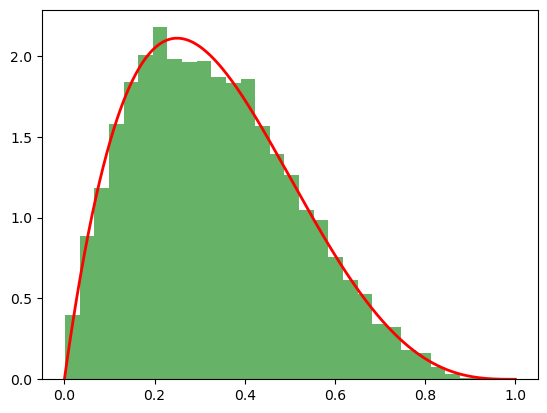

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target PDF f(x)
def f(x):
    return 20 * x * (1 - x) ** 3

# g(x) is uniform over [0, 1]
def g(x):
    return 1

# Find the maximum of f(x) to determine c
x_vals = np.linspace(0, 1, 1000)
c = max(f(x_vals))

# Acceptance-Rejection Sampling
def acceptance_rejection_sampling(num_samples):
    samples = []
    iterations = []
    while len(samples) < num_samples:
        iteration_count = 0
        while True:
            iteration_count += 1
            X = np.random.uniform(0, 1)
            U = np.random.uniform(0, 1)
            if U <= f(X) / (c * g(X)):
                samples.append(X)
                iterations.append(iteration_count)
                break
    return np.array(samples), np.array(iterations)

# Generate 10,000 samples
samples, iterations = acceptance_rejection_sampling(10000)

# Part (b) Sample mean
sample_mean = np.mean(samples)
theoretical_mean = 4/15  # Computed as integral of x * f(x)
print(f"Sample Mean: {sample_mean}, Theoretical Mean: {theoretical_mean}")

# Part (c) Compute probability P(0.25 <= X <= 0.75)
sample_prob = np.mean((samples >= 0.25) & (samples <= 0.75))
# Exact value (calculated analytically)
exact_prob = 47/80
print(f"Sample Probability: {sample_prob}, Exact Probability: {exact_prob}")

# Part (d) Average number of iterations
avg_iterations = np.mean(iterations)
print(f"Average number of iterations: {avg_iterations}")

# Part (e) Plot histogram and PDF
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x_vals, f(x_vals), 'r-', lw=2)
plt.show()

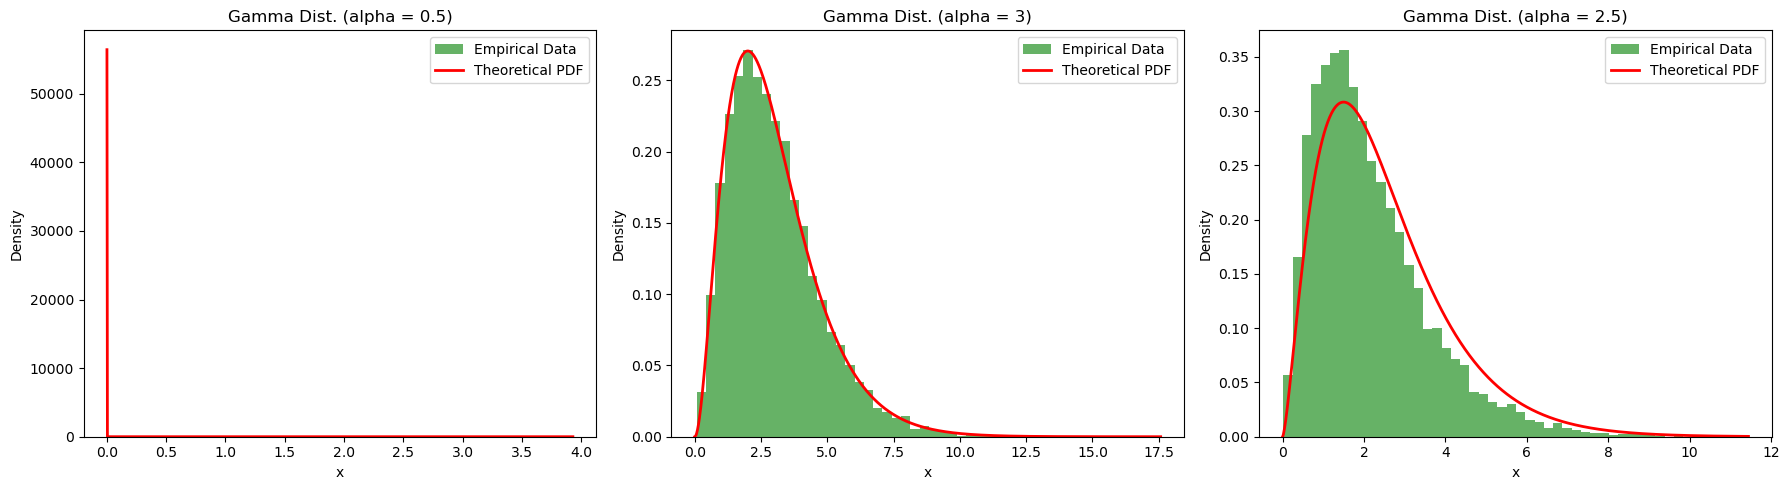

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

# Small constant to avoid issues with log(0) or division by zero
tiny_val = 1e-10

# Function to calculate the gamma probability density function
def compute_gamma_density(x, alpha):
    x = np.clip(x, tiny_val, None)  # Ensure x is never zero or negative
    scale_factor = gamma_func(alpha)
    density = (x ** (alpha - 1)) * np.exp(-x) / scale_factor
    return density

# Acceptance-rejection sampler for alpha < 1
def sample_gamma_small_alpha(alpha, n):
    B = (1 + alpha) / np.e
    result = []
    while len(result) < n:
        V1 = np.random.uniform()
        V2 = np.random.uniform()
        candidate = (V1 * B / alpha) ** (1 / alpha) if V1 <= alpha / B else -np.log((B * (1 - V1)) / alpha)
        if V2 <= compute_gamma_density(candidate, alpha) * B:
            result.append(candidate)
    return np.array(result)

# Direct sampler for integer alpha values using the sum of exponentials
def sample_gamma_integer_alpha(alpha, n):
    return -np.sum(np.log(np.random.uniform(size=(n, alpha))), axis=1)

# Combined method for non-integer alpha > 1
def sample_gamma_large_non_integer_alpha(alpha, n):
    integer_part = int(np.floor(alpha))
    fractional_part = alpha - integer_part
    samples_int_part = sample_gamma_integer_alpha(integer_part, n)
    samples_frac_part = sample_gamma_small_alpha(fractional_part, n)
    return samples_int_part + samples_frac_part

# Function to generate gamma-distributed samples based on alpha
def generate_gamma(alpha, n_samples):
    if alpha < 1:
        return sample_gamma_small_alpha(alpha, n_samples)
    elif alpha == np.floor(alpha):
        return sample_gamma_integer_alpha(int(alpha), n_samples)
    else:
        return sample_gamma_large_non_integer_alpha(alpha, n_samples)

# Visualization for various alpha values
def visualize_gamma_distributions(alpha_list, n_samples):
    fig, axes = plt.subplots(1, len(alpha_list), figsize=(18, 5))
    for i, alpha in enumerate(alpha_list):
        ax = axes[i]
        samples = generate_gamma(alpha, n_samples)
        ax.hist(samples, bins=50, density=True, color='g', alpha=0.6, label='Empirical Data')

        x_vals = np.linspace(0, np.max(samples), 1000)
        ax.plot(x_vals, compute_gamma_density(x_vals, alpha), 'r-', lw=2, label='Theoretical PDF')
        ax.set_title(f'Gamma Dist. (alpha = {alpha})')
        ax.set_xlabel('x')
        ax.set_ylabel('Density')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Define alpha values and number of samples
alpha_values_to_test = [0.5, 3, 2.5]
num_samples = 10000

# Run visualization
visualize_gamma_distributions(alpha_values_to_test, num_samples)